This noteook is pretty similar to notebook - 2

Here, we are just removing the B and C class data from the original data and training the SVM and comparing the result.

# Imports

In [1]:
!pip install scipy
import json
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import scipy.stats as st
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import pandas as pd
import numpy as np
!pip install sktime
from sktime.datasets import load_airline
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import DataFrame
from datetime import datetime
from sklearn.linear_model import RidgeClassifierCV
!pip install tsai
from tsai.models.MINIROCKET import *
from tsai.basics import *
import scipy.stats as stats
from sklearn.model_selection import TimeSeriesSplit
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.transformations.panel.rocket import Rocket
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where


def load(file_name):
    with open(file_name, 'rb') as fp: 
        obj = pickle.load(fp)
    return obj

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import statistics 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
!pip install --upgrade pip


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


# Data loading

In [2]:
p1_data = pd.read_csv('p1_data_new.csv', index_col=0)
p2_data = pd.read_csv('p2_data_new.csv', index_col=0)
p3_data = pd.read_csv('p3_data_new.csv', index_col=0)
p4_data = pd.read_csv('p4_data_new.csv', index_col=0)
p5_data = pd.read_csv('p5_data_new.csv', index_col=0)
p1_labels = pd.read_pickle(r'partition1_labels.pkl')
p2_labels = pd.read_pickle(r'partition2_labels.pkl')
p3_labels = pd.read_pickle(r'partition3_labels.pkl')
p4_labels = pd.read_pickle(r'partition4_labels.pkl')
p5_labels = pd.read_pickle(r'partition5_labels.pkl')

# Removing B and C class flares

In [3]:
print("Partition 1 Data and Labels Shape: ")
print(p1_data.shape)
print(p1_labels.shape)
print(np.unique(p1_labels, return_counts=1))
print("\n")


print("Partition 2 Data and Labels Shape: ")
print(p2_data.shape)
print(p2_labels.shape)
print(np.unique(p2_labels, return_counts=1))
print("\n")

print("Partition 3 Data and Labels Shape: ")
print(p3_data.shape)
print(p3_labels.shape)
print(np.unique(p3_labels, return_counts=1))
print("\n")

print("Partition 4 Data and Labels Shape: ")
print(p4_data.shape)
print(p4_labels.shape)
print(np.unique(p4_labels, return_counts=1))
print("\n")

print("Partition 5 Data and Labels Shape: ")
print(p5_data.shape)
print(p5_labels.shape)
print(np.unique(p5_labels, return_counts=1))

Partition 1 Data and Labels Shape: 
(69189, 120)
(69189,)
(array(['B', 'C', 'F', 'M', 'X'], dtype='<U1'), array([ 5424,  6266, 56319,  1029,   151]))


Partition 2 Data and Labels Shape: 
(79541, 120)
(79541,)
(array(['B', 'C', 'F', 'M', 'X'], dtype='<U1'), array([ 4681,  8211, 65364,  1225,    60]))


Partition 3 Data and Labels Shape: 
(37812, 120)
(37812,)
(array(['B', 'C', 'F', 'M', 'X'], dtype='<U1'), array([  638,  5131, 30766,  1164,   113]))


Partition 4 Data and Labels Shape: 
(43585, 120)
(43585,)
(array(['B', 'C', 'F', 'M', 'X'], dtype='<U1'), array([  693,  5335, 36667,   817,    73]))


Partition 5 Data and Labels Shape: 
(66503, 120)
(66503,)
(array(['B', 'C', 'F', 'M', 'X'], dtype='<U1'), array([ 5384,  5317, 54908,   884,    10]))


In [4]:
# Removing B and C class

# Adding Target to main data
p1_data['Target'] = p1_labels
p2_data['Target'] = p2_labels
p3_data['Target'] = p3_labels
p4_data['Target'] = p4_labels
p5_data['Target'] = p5_labels

# Filtering F class Target from main data
p1_data = p1_data[p1_data['Target'] != 'B']
p2_data = p2_data[p2_data['Target'] != 'B']
p3_data = p3_data[p3_data['Target'] != 'B']
p4_data = p4_data[p4_data['Target'] != 'B']
p5_data = p5_data[p5_data['Target'] != 'B']
p1_data = p1_data[p1_data['Target'] != 'C']
p2_data = p2_data[p2_data['Target'] != 'C']
p3_data = p3_data[p3_data['Target'] != 'C']
p4_data = p4_data[p4_data['Target'] != 'C']
p5_data = p5_data[p5_data['Target'] != 'C']

# Splitting labels back from data
p1_labels = p1_data['Target'].values
p1_data = p1_data.drop(['Target'],axis=1).values

p2_labels = p2_data['Target'].values
p2_data = p2_data.drop(['Target'],axis=1).values

p3_labels = p3_data['Target'].values
p3_data = p3_data.drop(['Target'],axis=1).values

p4_labels = p4_data['Target'].values
p4_data = p4_data.drop(['Target'],axis=1).values

p5_labels = p5_data['Target'].values
p5_data = p5_data.drop(['Target'],axis=1).values

After removing F class

In [5]:
print("Partition 1 Data and Labels Shape: ")
print(p1_data.shape)
print(p1_labels.shape)
print(np.unique(p1_labels, return_counts=1))
print("\n")


print("Partition 2 Data and Labels Shape: ")
print(p2_data.shape)
print(p2_labels.shape)
print(np.unique(p2_labels, return_counts=1))
print("\n")

print("Partition 3 Data and Labels Shape: ")
print(p3_data.shape)
print(p3_labels.shape)
print(np.unique(p3_labels, return_counts=1))
print("\n")

print("Partition 4 Data and Labels Shape: ")
print(p4_data.shape)
print(p4_labels.shape)
print(np.unique(p4_labels, return_counts=1))
print("\n")

print("Partition 5 Data and Labels Shape: ")
print(p5_data.shape)
print(p5_labels.shape)
print(np.unique(p5_labels, return_counts=1))

Partition 1 Data and Labels Shape: 
(57499, 120)
(57499,)
(array(['F', 'M', 'X'], dtype=object), array([56319,  1029,   151]))


Partition 2 Data and Labels Shape: 
(66649, 120)
(66649,)
(array(['F', 'M', 'X'], dtype=object), array([65364,  1225,    60]))


Partition 3 Data and Labels Shape: 
(32043, 120)
(32043,)
(array(['F', 'M', 'X'], dtype=object), array([30766,  1164,   113]))


Partition 4 Data and Labels Shape: 
(37557, 120)
(37557,)
(array(['F', 'M', 'X'], dtype=object), array([36667,   817,    73]))


Partition 5 Data and Labels Shape: 
(55802, 120)
(55802,)
(array(['F', 'M', 'X'], dtype=object), array([54908,   884,    10]))


# Converting labels into binary

In [6]:
# Partition 1 Labels
p1_labels_binary = np.where(p1_labels == 'F', 'NF', p1_labels)
p1_labels_binary = np.where(p1_labels_binary == 'M', 'F', p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'X', 'F', p1_labels_binary)

# Partition 2 Labels
p2_labels_binary = np.where(p2_labels == 'F', 'NF', p2_labels)
p2_labels_binary = np.where(p2_labels_binary == 'M', 'F', p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'X', 'F', p2_labels_binary)

# Partition 3 Labels
p3_labels_binary = np.where(p3_labels == 'F', 'NF', p3_labels)
p3_labels_binary = np.where(p3_labels_binary == 'M', 'F', p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'X', 'F', p3_labels_binary)

# Partition 4 Labels
p4_labels_binary = np.where(p4_labels == 'F', 'NF', p4_labels)
p4_labels_binary = np.where(p4_labels_binary == 'M', 'F', p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'X', 'F', p4_labels_binary)

# Partition 5 Labels
p5_labels_binary = np.where(p5_labels == 'F', 'NF', p5_labels)
p5_labels_binary = np.where(p5_labels_binary == 'M', 'F', p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'X', 'F', p5_labels_binary)

# All possible partition pair

All Class Labels

In [7]:
pp_20_all = [ 
[p1_data, p2_data, p1_labels, p2_labels],

[p1_data, p3_data, p1_labels, p3_labels],

[p1_data, p4_data, p1_labels, p4_labels],

[p1_data, p5_data, p1_labels, p5_labels],

[p2_data, p1_data, p2_labels, p1_labels],

[p2_data, p3_data, p2_labels, p3_labels],

[p2_data, p4_data, p2_labels, p4_labels],

[p2_data, p5_data, p2_labels, p5_labels],

[p3_data, p1_data, p3_labels, p1_labels],

[p3_data, p2_data, p3_labels, p2_labels],

[p3_data, p4_data, p3_labels, p4_labels],

[p3_data, p5_data, p3_labels, p5_labels],

[p4_data, p1_data, p4_labels, p1_labels],

[p4_data, p2_data, p4_labels, p2_labels],

[p4_data, p3_data, p4_labels, p3_labels],

[p4_data, p5_data, p4_labels, p5_labels],

[p5_data, p1_data, p5_labels, p1_labels],

[p5_data, p2_data, p5_labels, p2_labels],

[p5_data, p3_data, p5_labels, p3_labels],

[p5_data, p4_data, p5_labels, p4_labels],
]

Binary Labels

In [8]:
pp_20_bin = [ 
[p1_data, p2_data, p1_labels_binary, p2_labels_binary],

[p1_data, p3_data, p1_labels_binary, p3_labels_binary],

[p1_data, p4_data, p1_labels_binary, p4_labels_binary],

[p1_data, p5_data, p1_labels_binary, p5_labels_binary],

[p2_data, p1_data, p2_labels_binary, p1_labels_binary],

[p2_data, p3_data, p2_labels_binary, p3_labels_binary],

[p2_data, p4_data, p2_labels_binary, p4_labels_binary],

[p2_data, p5_data, p2_labels_binary, p5_labels_binary],

[p3_data, p1_data, p3_labels_binary, p1_labels_binary],

[p3_data, p2_data, p3_labels_binary, p2_labels_binary],

[p3_data, p4_data, p3_labels_binary, p4_labels_binary],

[p3_data, p5_data, p3_labels_binary, p5_labels_binary],

[p4_data, p1_data, p4_labels_binary, p1_labels_binary],

[p4_data, p2_data, p4_labels_binary, p2_labels_binary],

[p4_data, p3_data, p4_labels_binary, p3_labels_binary],

[p4_data, p5_data, p4_labels_binary, p5_labels_binary],

[p5_data, p1_data, p5_labels_binary, p1_labels_binary],

[p5_data, p2_data, p5_labels_binary, p2_labels_binary],

[p5_data, p3_data, p5_labels_binary, p3_labels_binary],

[p5_data, p4_data, p5_labels_binary, p4_labels_binary],
]

# Experiment 1 : Binary

In [9]:
st = time.time()
acc = []
cm = []

pair = 1

for i in pp_20_bin:
    
    print("Pair Number: ", pair)
    pair+=1
    
    svc=SVC() 

    # fit classifier to training set
    svc.fit(i[0],i[2])

    # make predictions on test set
    y_pred=svc.predict(i[1])

    # compute and print accuracy score
    score = accuracy_score(i[3], y_pred)
    acc.append(score)
    print(score)
    
    #confusion matrix
    score2 = confusion_matrix(i[3],y_pred)
    cm.append(score2)
    print(score2)
    print("\n")
    
et = time.time()
ft = et-st
print("Execution Time:", ft, "seconds")

Pair Number:  1
0.9835856501973023
[[  414   871]
 [  223 65141]]


Pair Number:  2
0.9649533439440752
[[  459   818]
 [  305 30461]]


Pair Number:  3
0.980216737226083
[[  367   523]
 [  220 36447]]


Pair Number:  4
0.9859324038564926
[[  235   659]
 [  126 54782]]


Pair Number:  5
0.9808344492947704
[[  366   814]
 [  288 56031]]


Pair Number:  6
0.9683550229379272
[[  560   717]
 [  297 30469]]


Pair Number:  7
0.9775008653513326
[[  388   502]
 [  343 36324]]


Pair Number:  8
0.9869001111071288
[[  292   602]
 [  129 54779]]


Pair Number:  9
0.9743125967408128
[[  271   909]
 [  568 55751]]


Pair Number:  10
0.9813050458371468
[[  468   817]
 [  429 64935]]


Pair Number:  11
0.9767553318955188
[[  355   535]
 [  338 36329]]


Pair Number:  12
0.9868821906024874
[[  307   587]
 [  145 54763]]


Pair Number:  13
0.9780344005982713
[[  229   951]
 [  312 56007]]


Pair Number:  14
0.9828504553706733
[[  324   961]
 [  182 65182]]


Pair Number:  15
0.9635801891208688
[[  268 

Measures

In [11]:

tss = []
hss2 = []
order = 1
for i in cm:
    TP, FN, FP, TN = i.ravel()
    TN = np.array(TN)
    FP = np.array(FP)
    FN = np.array(FN)
    TP = np.array(TP)
    acc = (TP + TN) / (TP + FN + TN + FP)
    pr_pos = TP/(TP + FP)
    pr_neg = TN/(TN + FN)
    rc_pos = TP/(TP + FN)
    rc_neg = TN/(TN + FP)
    f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
    f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)
    P = TP + FN
    N = TN + FP
    HSS1 = (TP + TN - N) / P
    HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)
    CH = ((TP+FP)*(TP+FN))/(P+N)
    GS = (TP-CH)/(TP+FP+FN-CH)
    TSS = ((TP*TN)-(FP*FN))/(P*N)
    measures_array = ["Acc:", acc, "pr_pos:", pr_pos, "pr_neg:", pr_neg, "rc_pos:", rc_pos, "rc_neg:", rc_neg, "f1_pos:", f1_pos, "f1_neg:", f1_neg, "HSS1:", HSS1, "HSS2:", HSS2, "GS:", GS, "TSS:", TSS]
    tss.append(TSS)
    hss2.append(HSS2)
    print("Pair Number: ",order)
    order += 1
    print(measures_array)
    print("\n")

Pair Number:  1
['Acc:', 0.9835856501973023, 'pr_pos:', 0.6499215070643642, 'pr_neg:', 0.986805429315882, 'rc_pos:', 0.32217898832684827, 'rc_neg:', 0.9965883360871428, 'f1_pos:', 0.43080124869927167, 'f1_neg:', 0.9916727560589452, 'HSS1:', 0.14863813229571984, 'HSS2:', 0.42343281026198104, 'GS:', 0.268578981611525, 'TSS:', 0.318767324413991]


Pair Number:  2
['Acc:', 0.9649533439440752, 'pr_pos:', 0.6007853403141361, 'pr_neg:', 0.9738482688065475, 'rc_pos:', 0.3594361785434612, 'rc_neg:', 0.9900864590782033, 'f1_pos:', 0.44977951984321407, 'f1_neg:', 0.9819002337013458, 'HSS1:', 0.12059514487079091, 'HSS2:', 0.4328583807338445, 'GS:', 0.27620884763212333, 'TSS:', 0.34952263762166447]


Pair Number:  3
['Acc:', 0.980216737226083, 'pr_pos:', 0.6252129471890971, 'pr_neg:', 0.9858533946443062, 'rc_pos:', 0.41235955056179774, 'rc_neg:', 0.9940000545449587, 'f1_pos:', 0.49695328368314157, 'f1_neg:', 0.9899099637410541, 'HSS1:', 0.1651685393258427, 'HSS2:', 0.4872960355636372, 'GS:', 0.3221

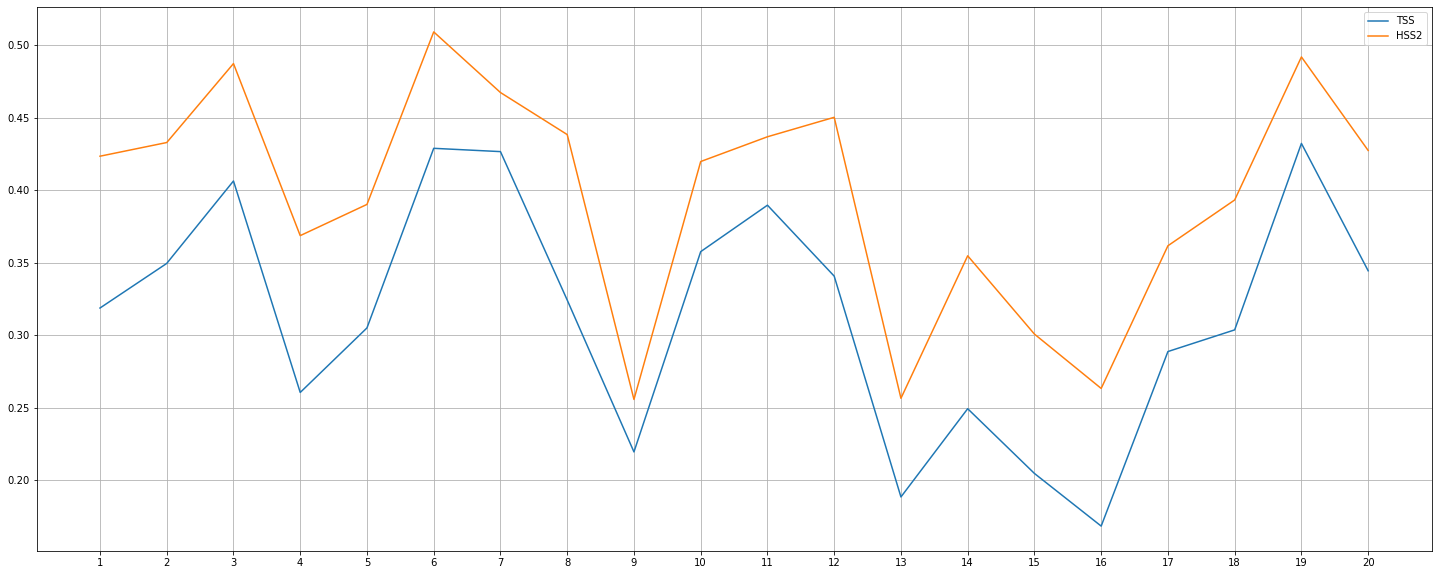

In [12]:
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss, label='TSS')
plt.plot(pair, hss2, label='HSS2')
plt.legend()
plt.xticks(pair)
plt.grid(True)

In [13]:
print("TSS of binary labels: ",tss)
print("\nHSS2 of binary labels: ",hss2)

TSS of binary labels:  [0.318767324413991, 0.34952263762166447, 0.40635960510675645, 0.26056878709784875, 0.305055764364075, 0.4288742859112188, 0.426600595765779, 0.32427253951250407, 0.2195756106031592, 0.35763908880696116, 0.38965830647709127, 0.34075966648462536, 0.18852792551870834, 0.24935567050199814, 0.20473133625780904, 0.1684379027990526, 0.28877167924483443, 0.3037039153622087, 0.4322461650172563, 0.3444527623804033]

HSS2 of binary labels:  [0.42343281026198104, 0.4328583807338445, 0.4872960355636372, 0.36868325765000404, 0.39020243398582344, 0.5091234479910436, 0.4673321850821326, 0.4383448541822297, 0.2557558952909489, 0.4197665378719319, 0.4368307007220351, 0.4502511368708463, 0.25653187610330114, 0.35477990345880434, 0.3007979716246215, 0.2633350539220968, 0.3616959011918415, 0.39326079809085795, 0.4918701668352439, 0.42738682308394615]


# Experiment 2 - All Labels

In [14]:
st = time.time()

acc_all = []
cm_all = []

pair = 1

for i in pp_20_all:
    
    print("Pair Number: ", pair)
    pair+=1
    
    svc=SVC(random_state=1024) 

    # fit classifier to training set
    svc.fit(i[0],i[2])

    # make predictions on test set
    y_pred=svc.predict(i[1])

    # compute and print accuracy score
    score = accuracy_score(i[3], y_pred)
    acc_all.append(score)
    print(score)
    
    #confusion matrix
    score2 = confusion_matrix(i[3],y_pred)
    cm_all.append(score2)
    print(score2)
    print("\n")
    
et = time.time()
ft = et-st
print("Execution Time:", ft, "seconds")

Pair Number:  1
0.983510630317034
[[65201   163     0]
 [  876   349     0]
 [    6    54     0]]


Pair Number:  2
0.9635801891208688
[[30468   281    17]
 [  742   408    14]
 [   79    34     0]]


Pair Number:  3
0.9794978299651197
[[36470   180    17]
 [  500   317     0]
 [   24    49     0]]


Pair Number:  4
0.9852693451847604
[[54791   116     1]
 [  663   189    32]
 [    0    10     0]]


Pair Number:  5
0.9807822744743386
[[56037   281     1]
 [  672   357     0]
 [  143     8     0]]


Pair Number:  6
0.9655775052273508
[[30474   290     2]
 [  652   466    46]
 [   73    40     0]]


Pair Number:  7
0.975956546050004
[[36324   343     0]
 [  487   330     0]
 [   18    55     0]]


Pair Number:  8
0.9865596215189419
[[54781   127     0]
 [  605   271     8]
 [    0    10     0]]


Pair Number:  9
0.9740169394250334
[[55757   542    20]
 [  781   248     0]
 [  144     7     0]]


Pair Number:  10
0.9798946720881033
[[64912   435    17]
 [  797   397    31]
 [   24    36  

Measures

In [15]:
tss_all = []
hss2_all = []
order = 1
for i in cm_all:
    listt = list(i.ravel())
    TP = listt[4] + listt[5] + listt[7] + listt[8]
    FN = listt[3] + listt[6]
    FP = listt[1] + listt[2]
    TN = listt[0]
    TN = np.array(TN)
    FP = np.array(FP)
    FN = np.array(FN)
    TP = np.array(TP)
    acc = (TP + TN) / (TP + FN + TN + FP)
    pr_pos = TP/(TP + FP)
    pr_neg = TN/(TN + FN)
    rc_pos = TP/(TP + FN)
    rc_neg = TN/(TN + FP)
    f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
    f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)
    P = TP + FN
    N = TN + FP
    HSS1 = (TP + TN - N) / P
    HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)
    CH = ((TP+FP)*(TP+FN))/(P+N)
    GS = (TP-CH)/(TP+FP+FN-CH)
    TSS = ((TP*TN)-(FP*FN))/(P*N)
    measures_array = ["Acc:", acc, "pr_pos:", pr_pos, "pr_neg:", pr_neg, "rc_pos:", rc_pos, "rc_neg:", rc_neg, "f1_pos:", f1_pos, "f1_neg:", f1_neg, "HSS1:", HSS1, "HSS2:", HSS2, "GS:", GS, "TSS:", TSS]
    tss_all.append(TSS)
    hss2_all.append(HSS2)
    print("Pair Number: ",order)
    order += 1
    print(measures_array)
    print("\n")

Pair Number:  1
['Acc:', 0.9843208450239314, 'pr_pos:', 0.7120141342756183, 'pr_neg:', 0.9866531483134846, 'rc_pos:', 0.31361867704280155, 'rc_neg:', 0.9975062725659385, 'f1_pos:', 0.435440302539168, 'f1_neg:', 0.9920500277678457, 'HSS1:', 0.1867704280155642, 'HSS2:', 0.428704171122349, 'GS:', 0.27283479230551055, 'TSS:', 0.31112494960874]


Pair Number:  2
['Acc:', 0.9650781762007302, 'pr_pos:', 0.6047745358090185, 'pr_neg:', 0.9737607465882578, 'rc_pos:', 0.3570869224745497, 'rc_neg:', 0.9903139829682117, 'f1_pos:', 0.44903988183161, 'f1_neg:', 0.9819676093787769, 'HSS1:', 0.12372748629600626, 'HSS2:', 0.4322396926212477, 'GS:', 0.27570521500441564, 'TSS:', 0.34740090544276137]


Pair Number:  3
['Acc:', 0.9808025135127939, 'pr_pos:', 0.650088809946714, 'pr_neg:', 0.9858355408985241, 'rc_pos:', 0.41123595505617977, 'rc_neg:', 0.9946273215698039, 'f1_pos:', 0.5037852718513419, 'f1_neg:', 0.9902119167537775, 'HSS1:', 0.1898876404494382, 'HSS2:', 0.4945022120500974, 'GS:', 0.32846425681

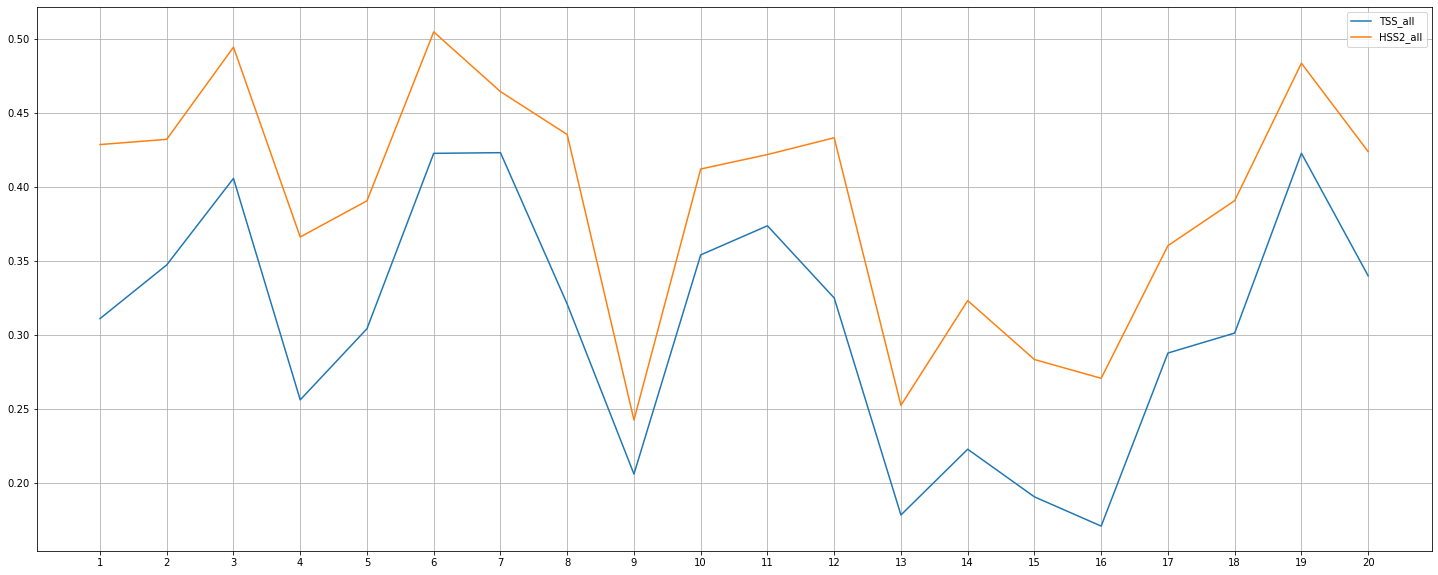

In [18]:
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss_all, label='TSS_all')
plt.plot(pair, hss2_all, label='HSS2_all')
plt.legend()
plt.xticks(pair)
plt.grid(True)

In [17]:
print("TSS of all labels: ",tss_all)
print("\nHSS2 of all labels: ",hss2_all)

TSS of all labels:  [0.31112494960874, 0.34740090544276137, 0.4058632766259837, 0.25625842470846905, 0.30431484271948445, 0.42277212012507986, 0.4232298092489251, 0.3209532593792439, 0.20612282455178899, 0.3541743726898301, 0.3738461519604163, 0.3250632866626282, 0.1784875562060069, 0.2229118254744398, 0.190733310082915, 0.17098464806455183, 0.28788870962353974, 0.30136928501201415, 0.4228491407416103, 0.3400401977959547]

HSS2 of all labels:  [0.428704171122349, 0.4322396926212477, 0.4945022120500974, 0.3662912946360324, 0.3907059860938388, 0.5048031286707846, 0.4644763113474436, 0.43547728443315054, 0.2426661209675693, 0.41219354571375544, 0.4219566322512552, 0.4332910794254171, 0.2525646477216274, 0.3232971616343093, 0.28351448062194295, 0.27081067369206696, 0.36040268276217224, 0.3908168470614973, 0.4836555085829918, 0.4239301740420853]


# 3 - Comparing TSS measure of SVM classifier for different class measures

### 3.1 - Binary Classification - All Classes V/S Classes without BC

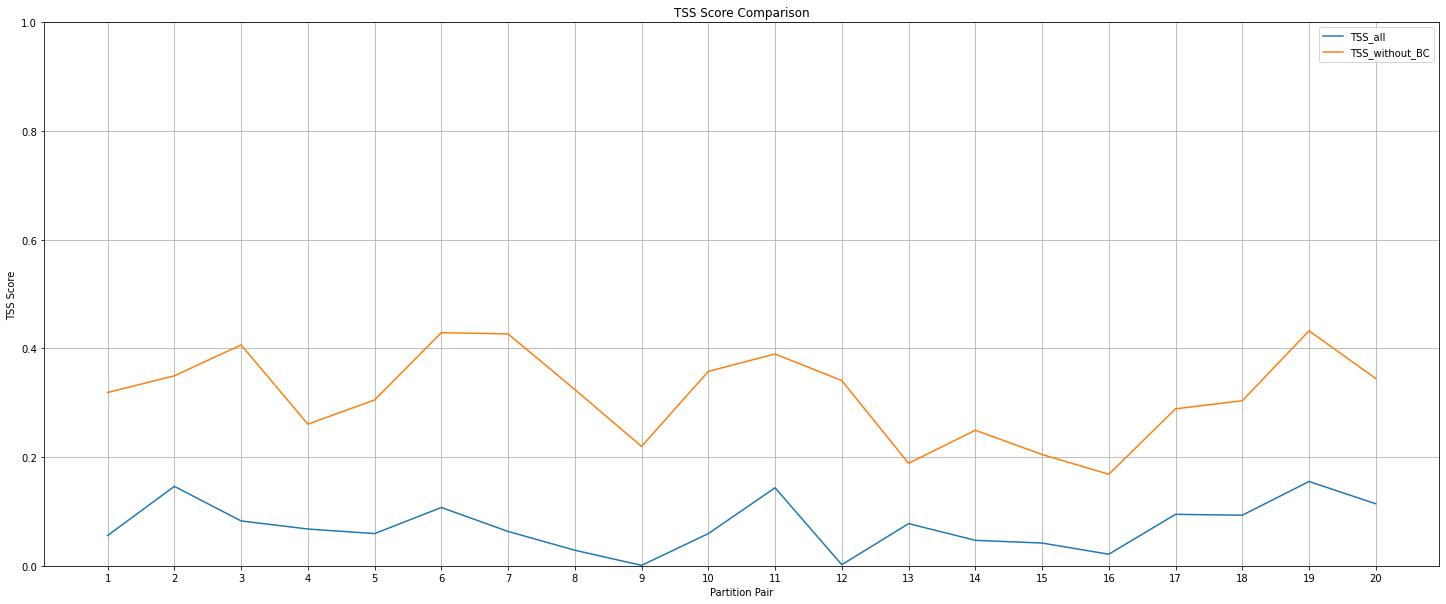

In [34]:
tss_bin_all = [0.055680975618681815, 0.14613862400532246, 0.08253578097058967, 0.0676746311780014, 0.05924314354206858, 0.10725204342195976, 0.06322451777765205, 0.02860095209150897, 0.0007739379458999819, 0.05924363179571467, 0.14353718760321119, 0.0020085092952714955, 0.07758379935257821, 0.0468830027677295, 0.041844021871519345, 0.02131967967100056, 0.0946732124935608, 0.09308104419536559, 0.15509306091208064, 0.1140875112339813]
tss_bin_BC = [0.318767324413991, 0.34952263762166447, 0.40635960510675645, 0.26056878709784875, 0.305055764364075, 0.4288742859112188, 0.426600595765779, 0.32427253951250407, 0.2195756106031592, 0.35763908880696116, 0.38965830647709127, 0.34075966648462536, 0.18852792551870834, 0.24935567050199814, 0.20473133625780904, 0.1684379027990526, 0.28877167924483443, 0.3037039153622087, 0.4322461650172563, 0.3444527623804033]
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss_bin_all, label='TSS_all')
plt.plot(pair, tss_bin_BC, label='TSS_without_BC')
plt.xlabel("Partition Pair")
plt.ylabel("TSS Score")
plt.title("TSS Score Comparison")
plt.ylim([0, 1])
plt.legend()
plt.xticks(pair)
plt.grid(True)

### 3.2 - All classes Classification - All Classes V/S Classes without BC

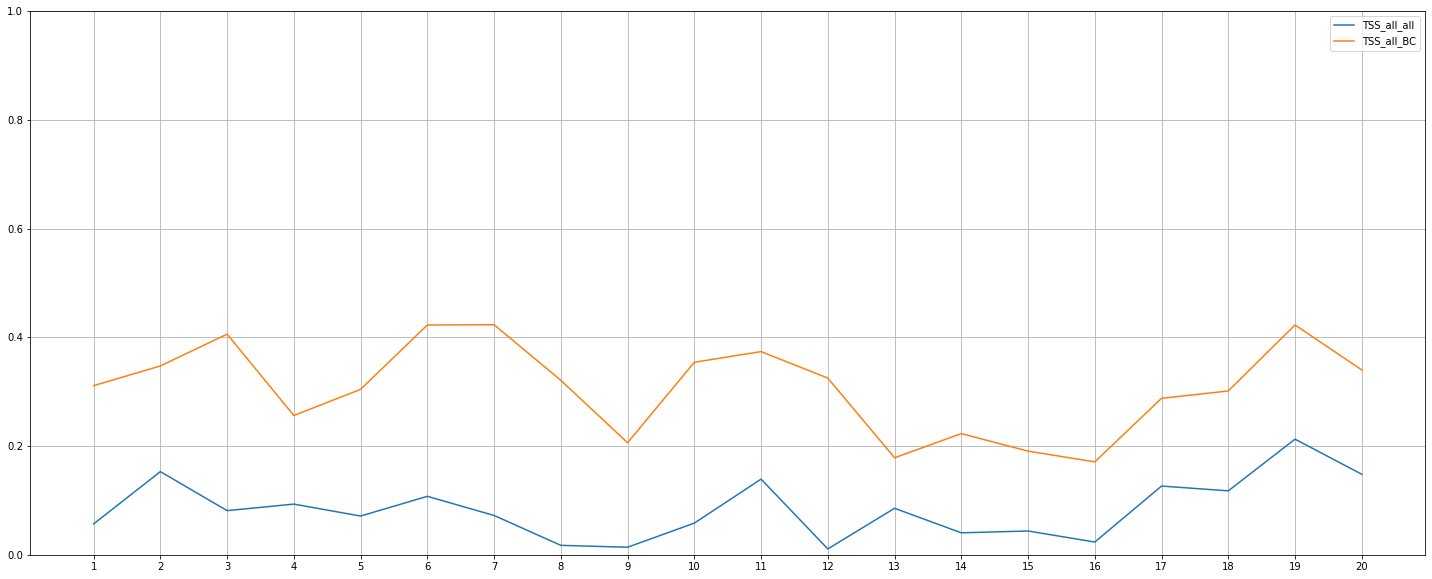

In [35]:
tss_all_all = [0.05680292437391954, 0.15302216612748054, 0.08124823184042548, 0.0932645242272001, 0.07126929362041066, 0.10758049559111263, 0.07235381350077832, 0.01740002795355019, 0.013921549764973779, 0.058273743085648456, 0.13920675920528547, 0.010819878854537302, 0.08554373785523402, 0.040427307521875726, 0.04378271272898977, 0.023495848890977507, 0.12647422537047065, 0.11764895937666818, 0.2127356449801571, 0.14812196781192966]
tss_all_BC = [0.31112494960874, 0.34740090544276137, 0.4058632766259837, 0.25625842470846905, 0.30431484271948445, 0.42277212012507986, 0.4232298092489251, 0.3209532593792439, 0.20612282455178899, 0.3541743726898301, 0.3738461519604163, 0.3250632866626282, 0.1784875562060069, 0.2229118254744398, 0.190733310082915, 0.17098464806455183, 0.28788870962353974, 0.30136928501201415, 0.4228491407416103, 0.3400401977959547]
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss_all_all, label='TSS_all_all')
plt.plot(pair, tss_all_BC, label='TSS_all_BC')
plt.ylim([0, 1])
plt.legend()
plt.xticks(pair)
plt.grid(True)

### 3.3 - Comparing all

<Figure size 432x288 with 0 Axes>

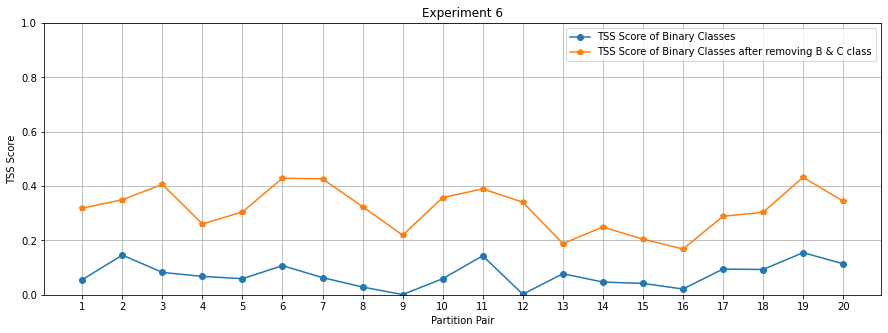

In [41]:
plt.figure()
tss_bin_all = [0.055680975618681815, 0.14613862400532246, 0.08253578097058967, 0.0676746311780014, 0.05924314354206858, 0.10725204342195976, 0.06322451777765205, 0.02860095209150897, 0.0007739379458999819, 0.05924363179571467, 0.14353718760321119, 0.0020085092952714955, 0.07758379935257821, 0.0468830027677295, 0.041844021871519345, 0.02131967967100056, 0.0946732124935608, 0.09308104419536559, 0.15509306091208064, 0.1140875112339813]
tss_bin_BC = [0.318767324413991, 0.34952263762166447, 0.40635960510675645, 0.26056878709784875, 0.305055764364075, 0.4288742859112188, 0.426600595765779, 0.32427253951250407, 0.2195756106031592, 0.35763908880696116, 0.38965830647709127, 0.34075966648462536, 0.18852792551870834, 0.24935567050199814, 0.20473133625780904, 0.1684379027990526, 0.28877167924483443, 0.3037039153622087, 0.4322461650172563, 0.3444527623804033]
tss_all_all = [0.05680292437391954, 0.15302216612748054, 0.08124823184042548, 0.0932645242272001, 0.07126929362041066, 0.10758049559111263, 0.07235381350077832, 0.01740002795355019, 0.013921549764973779, 0.058273743085648456, 0.13920675920528547, 0.010819878854537302, 0.08554373785523402, 0.040427307521875726, 0.04378271272898977, 0.023495848890977507, 0.12647422537047065, 0.11764895937666818, 0.2127356449801571, 0.14812196781192966]
tss_all_BC = [0.31112494960874, 0.34740090544276137, 0.4058632766259837, 0.25625842470846905, 0.30431484271948445, 0.42277212012507986, 0.4232298092489251, 0.3209532593792439, 0.20612282455178899, 0.3541743726898301, 0.3738461519604163, 0.3250632866626282, 0.1784875562060069, 0.2229118254744398, 0.190733310082915, 0.17098464806455183, 0.28788870962353974, 0.30136928501201415, 0.4228491407416103, 0.3400401977959547]
pair = np.arange(1,21)
plt.figure(figsize=(15,5))
plt.xlabel("Partition Pair")
plt.ylabel("TSS Score")
plt.title("Experiment 6")
# plt.plot(pair, tss_all_all, label='TSS - All')
# plt.plot(pair, tss_all_BC, label='TSS - All - Without B C')
plt.plot(pair, tss_bin_all, label='TSS Score of Binary Classes', marker='o')
plt.plot(pair, tss_bin_BC, label='TSS Score of Binary Classes after removing B & C class', marker='p')
plt.ylim([0, 1])
plt.legend()
plt.xticks(pair)
plt.grid(True)